# Exploratory Data Analysis

In [383]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import json
import seaborn as sns
import sklearn

In [384]:
login_times = pd.read_json('data/logins.json')


In [385]:
login_times.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [386]:
login_times.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [387]:
login_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [388]:
# Resample logins with 30 min intervals
login_times.set_index('login_time', inplace=True)
login_times['count'] = 1
login_times.sort_index(inplace=True)
login_times_agg = login_times.resample("30min").sum()

In [389]:
login_times_agg.head()

,count
login_time,
1970-01-01 20:00:00,8
1970-01-01 20:30:00,16
1970-01-01 21:00:00,5
1970-01-01 21:30:00,4
1970-01-01 22:00:00,17


In [390]:
# Verify that total count reflects all entries
login_times_agg['count'].sum()

93142

In [391]:
# Verify the date entries
login_times_agg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4894 entries, 1970-01-01 20:00:00 to 1970-04-13 18:30:00
Freq: 30T
Data columns (total 1 columns):
count    4894 non-null int64
dtypes: int64(1)
memory usage: 76.5 KB


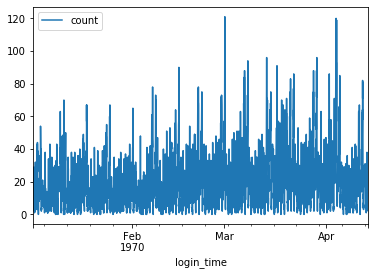

In [392]:
login_times_agg.plot()
plt.show()

From above plot, no clear depictions about the pattern of use from the above plot. Let's consider plotting for any month to have a more closer look.

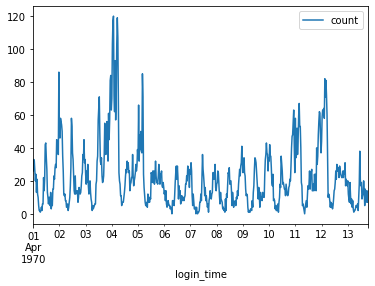

In [393]:
login_times_agg.loc['1970-04'].plot()
plt.show()

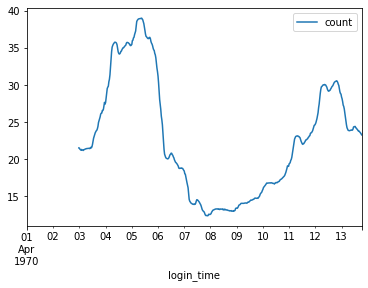

In [394]:
login_times_agg.loc['1970-04'].rolling(window=96).mean().plot()
plt.show()

This provides an overview as to how the use increases towards the end of the week.

In [395]:
datetime.datetime(1970, 4, 5).weekday()

6

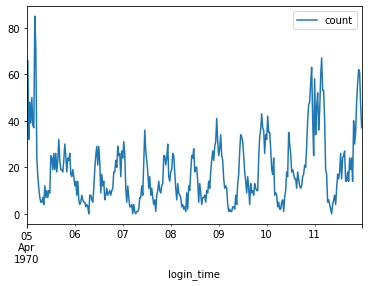

In [396]:
# Starting Sunday
login_times_agg.loc['1970-04-05':'1970-04-11'].plot()
plt.show()

The above plot shows increasing demand during the weekends than weekdays

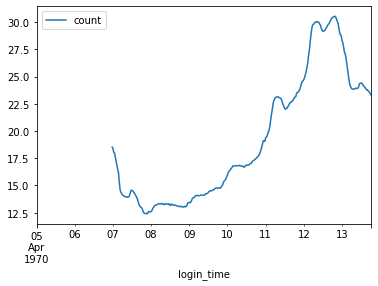

In [397]:
login_times_agg.loc['1970-04-05':'1970-04-15'].rolling(window=96).mean().plot()
plt.show()

More closer look, to show increase in demand during weekends

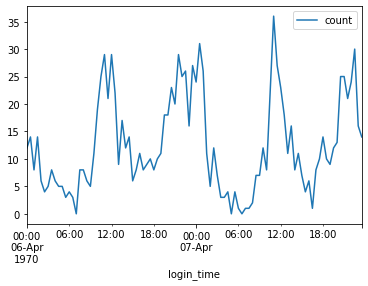

In [398]:
login_times_agg.loc['1970-04-06':'1970-04-07'].plot()
plt.show()

It looks like the demand is greater during afternoon and midnight on the weekends

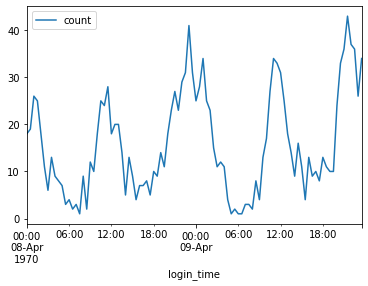

In [399]:
login_times_agg.loc['1970-04-08':'1970-04-09'].plot()
plt.show()

Also, the demand is high during afternoon and midnight on weekdays

From the above analysis - below are the two conclusions:
    1. Demand is greater towards the end of the week than during the week.
    2. Demand is greater at midnight and afternoon for both weekdays and weekends

# Experiment and metrics design

##### 1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

So in order for Ultimate to maximize its revenue and encourage driver partners to serve both cities, one key measure of success is to see if revenue has been maximized once the price equilibrium has reached in both the cities. Meaning, the cost charged in Gotham and Metropolis is same. 

For instance, if most of the Ultimate's drivers are in Gotham, then it might be the case that trip in Gotham costs around 3 dollars. Meanwhile, since there is a reduced supply of drivers in Metropolis it might be the case that the drivers in Metropilis might cost 6$ inorder to reap maximum revenue. Also, even if some of the drivers from Gotham are movedto Metropolis in order to take advantage of the higher profits it would lessen the demand of drivers in Gotham thereby allowing them to charge more.

Also, one more key thing to consider here is the toll charge. Some of the drivers may operate irrationally when there is a toll attached for drivers looking to move to less demand city to take advantage of the higher charges. So, if Utlimate waives the toll charges it might allow drivers cross the bridge more often in a given timeframe and enabling more trips and hence maximizing the revenue and also covering the toll charges.

##### 2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    a. how you will implement the experiment

If we have the information about what percentage of drivers currently cross the bridge and pay the toll, before implenting the proposed change of Ultimate waiving the toll fees.

Assuming, Ultimate provides this data, we can implement this by getting the metrics such as average number of drivers demand in a particular city.
   
    b. what statistical test(s) you will conduct to verify the significance of the observation
    
It is appropriate to use hypothesis testing considering the proportions of percentages of drivers who cross from one city to another. Our Null hypothesis would be that the proportion is the same irrespective of the proposed change.

    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
    
If the results proved that the change in proportion of drivers who cross the bridge from the city of greater demand to city of less demand in a give time frame is huge, then we can interpret that paying of toll fees is an effective solution inorder to meet the demands quickly. Also, if the proportion seems to be less and the proposed change was not effective then we might have to think about additional parameters to consider to enable drivers to cross the bridge and meet the demand.

I would recommend operations team to thoroughly research about the net effect to revenue from paying of tolls before implementing this proposed change. Also, we might also consider some of the other factors such as likelihood of drivers performing enough trips in the new city to justify the cost of Ultimate having to pay the tolls.

# Predictive modeling

In [400]:
# Load data
with open('data/ultimate_data_challenge.json') as f:
    data = json.load(f)
df = pd.DataFrame(data)

In [401]:
# Examine data for any null or missing values
print(df.shape)
print(df.info())
print(df.columns)

(50000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB
None
Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct'],
  

In [402]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [403]:
# Explore date
df.last_trip_date[0]

'2014-06-17'

In [404]:
# Transform string to datetime format
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)

In [405]:
# Get last trip date
df['last_trip_date'].describe()

count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

In [406]:
# Verify the fraction of users that were retained
fraction_retained = (df.last_trip_date >= '2014-06-01').sum() / (df.last_trip_date >= '2014-06-01').count()
fraction_retained

0.37608

In [407]:
df['was_retained'] = (df.last_trip_date >= '2014-06-01')*1
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,was_retained
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084,0.376080
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503,0.484405
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000,0.000000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000,0.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,1.000000


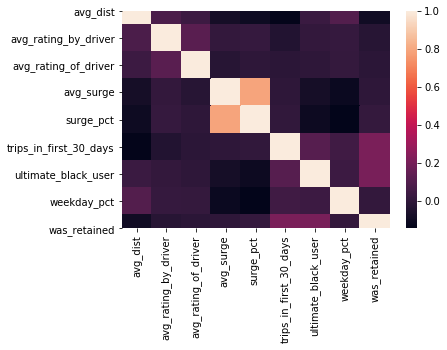

In [408]:
fig = plt.figure()
ax = plt.subplot(111)
corr = df.corr()
ax = sns.heatmap(corr)
plt.show()

In [409]:
corr['was_retained'].sort_values(ascending=False)

was_retained              1.000000
trips_in_first_30_days    0.210463
ultimate_black_user       0.205002
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
avg_rating_of_driver     -0.011653
avg_rating_by_driver     -0.026791
avg_dist                 -0.092780
Name: was_retained, dtype: float64

In [410]:
df.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [411]:
print(df.phone.value_counts())
(df.phone[df.phone.isnull()]).value_counts()
df.phone.fillna('Other', inplace=True)
print("After replacing nulls with Other value -----")
print(df.phone.value_counts())


iPhone     34582
Android    15022
Name: phone, dtype: int64
After replacing nulls with Other value -----
iPhone     34582
Android    15022
Other        396
Name: phone, dtype: int64


In [412]:
# One hot encoder
cities_ohe = pd.get_dummies(df['city'])
phones_ohe = pd.get_dummies(df['phone'])
df = df.join(cities_ohe).join(phones_ohe)
df.drop(['city', 'phone'], axis=1, inplace=True)

In [413]:
df.describe().iloc[:, -6:]

,Astapor,King's Landing,Winterfell,Android,Other,iPhone
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.330680,0.202600,0.466720,0.300440,0.007920,0.691640
std,0.470463,0.401941,0.498896,0.458454,0.088642,0.461821
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


33% of users are from Astapor, about 20% are from King's Landing, and the rest are from Winterfell.And, about 70% of users use an iPhone, and the rest use Android.

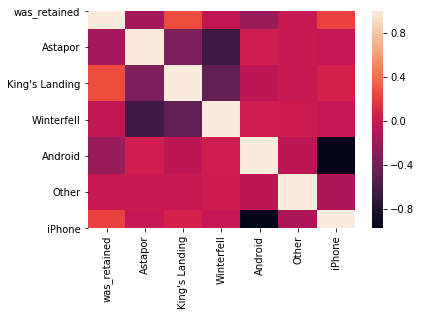

In [414]:
# Identify correlations
categoricals = df.iloc[:,-7:]
fig = plt.figure()
ax = plt.subplot(111)
corr = categoricals.corr()
ax = sns.heatmap(corr)
plt.show()


In [415]:
# Transform to int
df['ultimate_black_user'] = df['ultimate_black_user']*1

In [416]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,was_retained,Astapor,King's Landing,Winterfell,Android,Other,iPhone
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,0.37708,60.926084,0.376080,0.330680,0.202600,0.466720,0.300440,0.007920,0.691640
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,0.48466,37.081503,0.484405,0.470463,0.401941,0.498896,0.458454,0.088642,0.461821
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,0.00000,33.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,0.00000,66.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,1.00000,100.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,1.00000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Considering city and phone as categorical features and rest all of the features as numeric, which will be further used for modeling

In [417]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Import data
with open('data/ultimate_data_challenge.json') as f:
    data = json.load(f)
df = pd.DataFrame(data)

# Data pre-processing
df['was_retained'] = (df.last_trip_date >= '2014-06-01')*1
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)
df['signup_date'] = df['signup_date'].dt.strftime('%Y%m%d').astype(int) - 20140100
df['last_trip_date'] = (df['last_trip_date'] - min(df['last_trip_date'])).dt.days + 1
df.phone.fillna('Other', inplace=True)
categorical_features = ['city', 'phone']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder())
]
)
# Reducing records - just for execution purposes on my machine
df=df.head(2000)

# Setting seed for consistent results
np.random.seed(0)

In [418]:
# Define SVC classifier
numeric_features = [column for column in df.columns.tolist() if column not in categorical_features and
                    column not in ['last_trip_date', 'was_retained']]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
classifier_svm = SVC(random_state=0)

# Define pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_svm)])

In [419]:
# Define traing and test data
X = df.drop(['was_retained', 'last_trip_date'], axis=1)
y = df['was_retained']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
param_grid_svm = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [1, 0.1, 0.01]
}

In [420]:
# 5 fold Cross validation
cv = RandomizedSearchCV(pipeline, param_grid_svm, cv=5, iid=False, random_state=None)

In [421]:
# Train the classifier using training data
cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbo...'rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False))]),
          fit_params=None, iid=False, n_iter=10, n_jobs=None,
          param_distributions={'preprocessor__num__imputer__strategy': ['mean', 'median'], 'classifier__C': [0.1, 1, 10, 100], 'classifier__gamma': [1, 0.1, 0.01]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [422]:
# Predict the data
y_pred = cv.predict(X_test)

In [423]:
# Performance metric - Accuracy score
accuracy_score(y_pred, y_test)

0.7266666666666667

In [424]:
# Performance metric - Precision score
precision_score(y_pred, y_test)

0.537117903930131

In [425]:
# Performance metric - Recall score
recall_score(y_pred, y_test)

0.6795580110497238

In [426]:
# Define Confusion Matrix
def Confusion_Matrix(CM, labels=['Not Retained', 'Retained']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name = 'ACTUAL'
    df.columns.name = 'PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

In [427]:
Confusion_Matrix(confusion_matrix(y_test, y_pred))

PREDICTION,Not Retained,Retained,Total
ACTUAL,,,
Not Retained,313,58,371
Retained,106,123,229
Total,419,181,600
